In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

In [3]:
N_points = 41 # Number of points for constructing function
x_min = 1 # Min of the range of x (feature)
x_max = 10 # Max of the range of x (feature)
noise_mean = 0 # Mean of the Gaussian noise adder
noise_sd = 5 # Std.Dev of the Gaussian noise adder
ridge_alpha = tuple([10**(x) for x in range(-4,0,1) ]) # Alpha (regularization strength) of ridge regression
lasso_eps = 0.001
lasso_nalpha=20
lasso_iter=2000
degree_min = 2
degree_max = 8

In [4]:
def func(x):
    result = x**2*np.sin(x)*np.exp(-(1/x_max)*x)
    return (result)

noise_x = np.random.normal(loc=noise_mean,scale=noise_sd,size=N_points)

In [5]:
var_linear =[]
var_random =[]
mean_linear =[]
mean_random =[]
dfs = []

for i in range(50):
    
    #x_smooth = np.array(np.linspace(x_min,x_max,1001))
    # Linearly spaced sample points
    X=np.array(np.linspace(x_min,x_max,N_points))
    # Samples drawn from uniform random distribution
    X_sample = x_min+np.random.rand(N_points)*(x_max-x_min)
    #noise_x = np.random.normal(loc=noise_mean,scale=noise_sd,size=N_points)

    y = func(X)+noise_x
    y_sampled = func(X_sample)+noise_x

    df = pd.DataFrame(data=X,columns=['X'])
    df['Ideal y']=df['X'].apply(func)
    df['y']=y
    df['X_sampled']=X_sample
    df['y_sampled']=y_sampled

    X_train, X_test, y_train, y_test = train_test_split(df['X'], df['y'], test_size=0.33)
    X_train=X_train.values.reshape(-1,1)
    X_test=X_test.values.reshape(-1,1)

    linear_sample_score = []
    poly_degree = []
    for degree in range(degree_min,degree_max+1):
        model = make_pipeline(PolynomialFeatures(degree), RidgeCV(alphas=ridge_alpha,normalize=True,
                                                                  cv=5))
        #model = make_pipeline(PolynomialFeatures(degree), LassoCV(eps=lasso_eps,n_alphas=lasso_nalpha, 
                                                                  #max_iter=lasso_iter,normalize=True,cv=5))
        #model = make_pipeline(PolynomialFeatures(degree), LinearRegression(normalize=True))
        model.fit(X_train, y_train)
        y_pred = np.array(model.predict(X_train))
        test_pred = np.array(model.predict(X_test))
        RMSE=np.sqrt(np.sum(np.square(y_pred-y_train)))
        test_score = model.score(X_test,y_test)
        linear_sample_score.append(test_score)
        poly_degree.append(degree)
    
    var_linear.append(np.std(np.array(linear_sample_score)))
    mean_linear.append(np.mean(np.array(linear_sample_score)))

    # Modeling with randomly sampled data set
    X_train, X_test, y_train, y_test = train_test_split(df['X_sampled'], df['y_sampled'], test_size=0.33)
    X_train=X_train.values.reshape(-1,1)
    X_test=X_test.values.reshape(-1,1)

    random_sample_score = []
    poly_degree = []
    for degree in range(degree_min,degree_max+1):
        model = make_pipeline(PolynomialFeatures(degree),RidgeCV(alphas=ridge_alpha,normalize=True,
                                                                 cv=5))
        #model = make_pipeline(PolynomialFeatures(degree), LassoCV(eps=lasso_eps,n_alphas=lasso_nalpha, 
                                                                  #max_iter=lasso_iter,normalize=True,cv=5))
        #model = make_pipeline(PolynomialFeatures(degree), LinearRegression(normalize=True))
        model.fit(X_train, y_train)
        y_pred = np.array(model.predict(X_train))
        test_pred = np.array(model.predict(X_test))
        RMSE=np.sqrt(np.sum(np.square(y_pred-y_train)))
        test_score = model.score(X_test,y_test)
        random_sample_score.append(test_score)
        poly_degree.append(degree)
    
    var_random.append(np.std(np.array(random_sample_score)))
    mean_random.append(np.mean(np.array(random_sample_score)))

    df_score = pd.DataFrame(data={'degree':[d for d in range(degree_min,degree_max+1)],
                                  'Linear sample score':linear_sample_score,
                                  'Random sample score':random_sample_score})
    dfs.append(df_score)
    #print(df_score)
    #print("\n")
    print ("Run # {} finished".format(i+1))

Run # 1 finished
Run # 2 finished
Run # 3 finished
Run # 4 finished
Run # 5 finished
Run # 6 finished
Run # 7 finished
Run # 8 finished
Run # 9 finished
Run # 10 finished
Run # 11 finished
Run # 12 finished
Run # 13 finished
Run # 14 finished
Run # 15 finished
Run # 16 finished
Run # 17 finished
Run # 18 finished
Run # 19 finished
Run # 20 finished
Run # 21 finished
Run # 22 finished
Run # 23 finished
Run # 24 finished
Run # 25 finished
Run # 26 finished
Run # 27 finished
Run # 28 finished
Run # 29 finished
Run # 30 finished
Run # 31 finished
Run # 32 finished
Run # 33 finished
Run # 34 finished
Run # 35 finished
Run # 36 finished
Run # 37 finished
Run # 38 finished
Run # 39 finished
Run # 40 finished
Run # 41 finished
Run # 42 finished
Run # 43 finished
Run # 44 finished
Run # 45 finished
Run # 46 finished
Run # 47 finished
Run # 48 finished
Run # 49 finished
Run # 50 finished


In [6]:
df1=pd.concat(dfs)

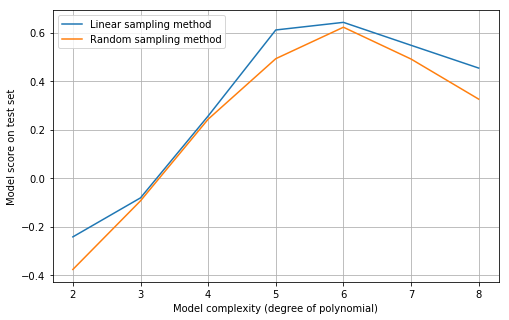

In [7]:
rand = []
lin = []
for i in range(degree_max+1-degree_min):
    rand.append(df1.loc[i]['Random sample score'].mean())
    lin.append(df1.loc[i]['Linear sample score'].mean())

plt.figure(figsize=(8,5))
plt.plot(range(degree_min, degree_max+1),lin)
plt.plot(range(degree_min, degree_max+1),rand)
plt.xlabel("Model complexity (degree of polynomial)")
plt.ylabel("Model score on test set")
plt.legend(['Linear sampling method','Random sampling method'])
plt.grid(True)